In [1]:
import torch
import torch.optim as optim
import torch.nn as nn

from torch.autograd import grad


x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2

df_dx = grad(outputs=f, inputs=[x1, x2, x3, x4])

print('Using torch.autograd.grad:')
print(f'Gradients : {df_dx}')
print(f'Gradient w.r.t x1: {df_dx[0]}')
print(f'Gradient w.r.t x2: {df_dx[1]}')
print(f'Gradient w.r.t x3: {df_dx[2]}')
print(f'Gradient w.r.t x4: {df_dx[3]}')

Using torch.autograd.grad:
Gradients : (tensor(3., dtype=torch.float16), tensor(2., dtype=torch.float16), tensor(4., dtype=torch.float16), tensor(1., dtype=torch.float16))
Gradient w.r.t x1: 3.0
Gradient w.r.t x2: 2.0
Gradient w.r.t x3: 4.0
Gradient w.r.t x4: 1.0


In [2]:
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

opt = optim.SGD([x1, x2, x3, x4], lr=0.001)
opt.zero_grad()

z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2

f.backward()
opt.step()

print('Using .backword():')
print(f'Gradient w.r.t x1: {x1.grad}')
print(f'Gradient w.r.t x2: {x2.grad}')
print(f'Gradient w.r.t x3: {x3.grad}')
print(f'Gradient w.r.t x4: {x4.grad}')


Using .backword():
Gradient w.r.t x1: 3.0
Gradient w.r.t x2: 2.0
Gradient w.r.t x3: 4.0
Gradient w.r.t x4: 1.0




**두 방법의 차이점**

| 항목                        | `torch.autograd.grad`                            | `.backward()`                     |
|-----------------------------|--------------------------------------------------|------------------------------------|
| **기울기 계산 방식**         | 특정 입력 변수의 기울기 반환                    | 모든 `requires_grad=True` 변수의 기울기 저장 |
| **결과 저장 위치**           | 반환값(튜플)로 제공                             | 각 텐서의 `.grad` 속성에 저장      |
| **사용 편의성**              | 필요한 변수만 선택적으로 계산 가능               | 간단한 호출로 모든 변수 계산 가능  |
| **주요 사용 사례**           | 선택적 변수 기울기 계산, 반환값 활용이 필요한 경우 | 대부분의 딥러닝 모델 학습 과정    |
     
        
        

**정리**
- `torch.autograd.grad`는 특정 변수의 기울기만 필요하거나 반환값을 별도로 사용해야 할 때 적합합니다.
- `.backward()`는 일반적으로 모든 기울기를 계산하고 저장해야 하는 학습 과정에서 자주 사용됩니다.
- 두 방법 모두 PyTorch에서 기울기 계산의 핵심 기능을 제공하며, 용도에 따라 적절히 선택하여 사용할 수 있습니다.

In [3]:
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

opt = optim.SGD([x1, x2, x3, x4], lr=0.001)

for i in range(3):
    z1 = x1 * x2
    z2 = x3 * x4
    f = z1 + z2
    opt.zero_grad()
    
    f.backward()
    
    print('Using .backword():')
    print(f'Gradient w.r.t x1: {x1.grad}')
    print(f'Gradient w.r.t x2: {x2.grad}')
    print(f'Gradient w.r.t x3: {x3.grad}')
    print(f'Gradient w.r.t x4: {x4.grad}')

Using .backword():
Gradient w.r.t x1: 3.0
Gradient w.r.t x2: 2.0
Gradient w.r.t x3: 4.0
Gradient w.r.t x4: 1.0
Using .backword():
Gradient w.r.t x1: 3.0
Gradient w.r.t x2: 2.0
Gradient w.r.t x3: 4.0
Gradient w.r.t x4: 1.0
Using .backword():
Gradient w.r.t x1: 3.0
Gradient w.r.t x2: 2.0
Gradient w.r.t x3: 4.0
Gradient w.r.t x4: 1.0


### `torch.nn` 모듈이란?

`torch.nn`은 PyTorch에서 **신경망을 구축**하는 데 필요한 다양한 구성 요소와 기능을 제공하는 핵심 모듈입니다. 이 모듈은 딥러닝 모델을 정의하고 학습시키는 데 매우 유용한 계층(layer), 손실 함수(loss function), 활성화 함수(activation function), 그리고 기타 신경망 관련 도구들을 포함하고 있습니다.

### 1. 주요 특징

1. **신경망 구축과 학습 지원**
    - 딥러닝 모델을 구축하고 학습하는 데 필요한 다양한 도구 제공
2. **다양한 구성 요소**
    - 신경망의 각 계층, 활성화 함수, 손실 함수, 정규화 기법 등을 손쉽게 사용 가능
3. **모듈 상속으로 사용자 정의 모델 설계 가능**
    - `torch.nn.Module`을 상속받아 **사용자 정의 모델**을 설계할 수 있음



### 2. 모델 구성 요소

다음은 설계할 모델의 구조입니다:

| index | 0 | 1 | 2 |
| --- | --- | --- | --- |
| 레이어 타입 | Linear | Linear | Linear |
| 입력 차원 | 8 | 4 | 6 |
| 출력 차원 | 4 | 6 | 3 |
| 활성화 함수 | ReLU | ReLU | - |



### 3. 모델 정의 : `nn.Module` 상속

모델 클래스를 정의할 때, 반드시 `torch.nn.Module`을 상속받아야 합니다.

이로써 PyTorch의 다양한 기능을 활용할 수 있으며, 계층 구조를 손쉽게 설계할 수 있습니다.

In [4]:
class MyModel(nn.Module):
	def __init__(self):
		super().__init__()
		self.linear0 = nn.Linear(8,4)
		self.linear1 = nn.Linear(4,6)
		self.linear2 = nn.Linear(6,3)
		self.relu = nn.ReLU()

	def forward(self, x):
		x = self.relu(self.linear0(x))
		x = self.relu(self.linear1(x))
		y = self.linear2(x)
		return y

In [5]:
model = MyModel()

input_tensor = torch.rand(2,8) # Batch size of 2, input size of 8
res = model(input_tensor)
print('Model output:', res)

Model output: tensor([[ 0.3277,  0.3590, -0.3175],
        [ 0.3113,  0.4006, -0.3171]], grad_fn=<AddmmBackward0>)


In [6]:
class MyModel2(nn.Module):
	def __init__(self):
		super().__init__()
		self.block = MyModel() # MyModel이 서브모듈로 포함됨
		self.layer = nn.Linear(3, 4)

	def forward(self, x):
		x = self.block(x)
		y = self.layer(x)
		return y

In [7]:
model2 = MyModel2()
input_tensor = torch.rand(2,8) # Batch size of 2, input size of 8
res = model2(input_tensor)
print('Model2 output:', res)

Model2 output: tensor([[ 0.1993, -0.0629, -0.6687, -0.1754],
        [ 0.2241, -0.0416, -0.6881, -0.1633]], grad_fn=<AddmmBackward0>)


In [8]:
model = nn.Sequential(
	nn.Linear(8, 4),
	nn.ReLU(),
	nn.Linear(4, 6),
	nn.ReLU(),
	nn.Linear(6, 3)
)
input_tensor = torch.rand(2, 8)  # Batch size of 2, input size of 8
res = model(input_tensor)
print('Sequential model output:', res)

Sequential model output: tensor([[-0.1830, -0.1541,  0.3606],
        [-0.1469, -0.1239,  0.4220]], grad_fn=<AddmmBackward0>)


In [9]:
class MyModelWithSequential(nn.Module):
	def __init__(self):
		super().__init__()
		self.block = nn.Sequential(
			nn.Linear(8, 4),
			nn.ReLU(),
			nn.Linear(4, 6),
			nn.ReLU(),
			nn.Linear(6, 3)
		)
		self.layer = nn.Linear(3, 4)

	def forward(self, x):
		y = self.layer(self.block(x))
		return y

In [10]:
model = MyModelWithSequential()
input_tensor = torch.rand(2, 8)  # Batch size of 2, input size of 8
res = model(input_tensor)
print('MyModelWithSequential output:', res)

MyModelWithSequential output: tensor([[-0.1373,  0.0428, -0.4380, -0.4894],
        [-0.1344,  0.0526, -0.4266, -0.4737]], grad_fn=<AddmmBackward0>)


In [11]:
class MyModel3(nn.Module):
	def __init__(self):
		super().__init__()
		self.block = nn.Sequential(
			nn.Linear(1, 5),
			nn.ReLU(),
			nn.Linear(5, 3),
			nn.ReLU(),
			nn.Linear(3, 1)
		)

	def forward(self, x):
		y = self.block(x)
		return y

In [12]:
model = MyModel3()
input_tensor = torch.rand(2, 1)  # Batch size of 2, input size of 1
res = model(input_tensor)
print('MyModel3 output:', res)

MyModel3 output: tensor([[-0.4081],
        [-0.3983]], grad_fn=<AddmmBackward0>)


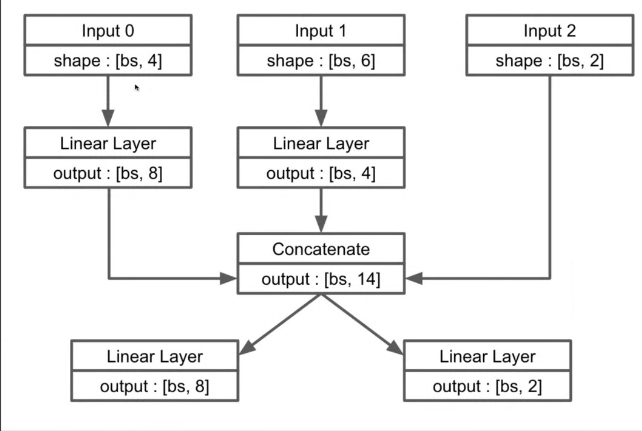

In [13]:
class ComplexModel(nn.Module):
	def __init__(self):
		super().__init__()
		self.linear0_0 = nn.Linear(4, 8)
		self.linear0_1 = nn.Linear(6, 4)
		self.linear1_0 = nn.Linear(14, 8)
		self.linear1_1 = nn.Linear(14, 2)
		self.relu = nn.ReLU()


	def forward(self, input0, input1, input2):
		h0_0 = self.relu(self.linear0_0(input0))
		h0_1 = self.relu(self.linear0_1(input1))

		h1 = torch.cat([h0_0, h0_1, input2], dim=1)

		output0 = self.linear1_0(h1)
		output1 = self.linear1_1(h1)
		return output0, output1


In [14]:
model = ComplexModel()

x0 = torch.ones(2,4)
x1 = torch.ones(2,6)
x2 = torch.ones(2,2)

y0, y1 = model(x0, x1, x2)

print('Complex model outputs:')
print('Output 0:', y0)
print('Output 1:', y1)

Complex model outputs:
Output 0: tensor([[ 0.2916,  0.0242, -0.0455, -0.0329, -0.2982,  0.2207,  0.0476,  0.0785],
        [ 0.2916,  0.0242, -0.0455, -0.0329, -0.2982,  0.2207,  0.0476,  0.0785]],
       grad_fn=<AddmmBackward0>)
Output 1: tensor([[0.3872, 0.1422],
        [0.3872, 0.1422]], grad_fn=<AddmmBackward0>)


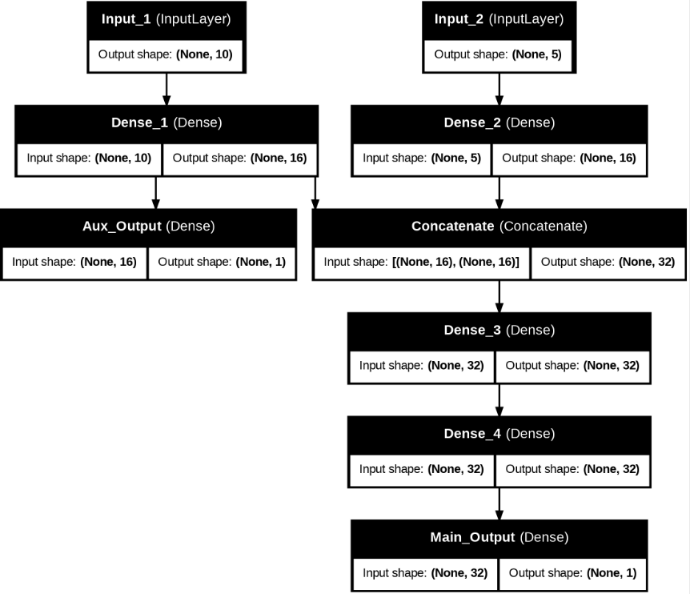

In [15]:
class ComplexModel2(nn.Module):
	def __init__(self):
		super().__init__()
		self.linear0_0 = nn.Linear(10, 16)
		self.linear0_1 = nn.Linear(16, 1)
		self.linear1_0 = nn.Linear(5, 16)
		self.linear2_0 = nn.Linear(32, 32)
		self.linear3_0 = nn.Linear(32, 1)
		self.relu = nn.ReLU()

	def forward(self, input0, input1):
		dense1 = self.relu(self.linear0_0(input0))
		aux_output = self.linear0_1(dense1)

		dense2 = self.relu(self.linear1_0(input1))

		concat = torch.cat([dense1, dense2], dim=1)

		dense3 =  self.relu(self.linear2_0(concat))
		dense4 =  self.relu(self.linear2_0(dense3))
		main_output = self.linear3_0(dense4)
		return aux_output, main_output

In [16]:
model = ComplexModel2()

x0 = torch.ones(1,10)
x1 = torch.ones(1,5)

y0, y1 = model(x0, x1)

print('Complex model outputs:')
print('Output 0:', y0)
print('Output 1:', y1)

Complex model outputs:
Output 0: tensor([[0.2832]], grad_fn=<AddmmBackward0>)
Output 1: tensor([[0.0139]], grad_fn=<AddmmBackward0>)


In [17]:
print(model)

ComplexModel2(
  (linear0_0): Linear(in_features=10, out_features=16, bias=True)
  (linear0_1): Linear(in_features=16, out_features=1, bias=True)
  (linear1_0): Linear(in_features=5, out_features=16, bias=True)
  (linear2_0): Linear(in_features=32, out_features=32, bias=True)
  (linear3_0): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [18]:
for named_param in model.named_parameters():
    print(f'Parameter name: {named_param[0]}, Parameter value: {named_param[1]}')

Parameter name: linear0_0.weight, Parameter value: Parameter containing:
tensor([[ 0.0498, -0.2929, -0.0677,  0.2933, -0.1452, -0.1543,  0.2164,  0.1970,
         -0.0921, -0.2390],
        [ 0.0661, -0.0017,  0.0972,  0.2889,  0.2877, -0.1645, -0.2205, -0.1862,
         -0.0674, -0.2559],
        [ 0.0200, -0.0661,  0.3040, -0.2904,  0.2909,  0.2931, -0.1377,  0.1068,
         -0.1065,  0.2557],
        [ 0.2713,  0.2510, -0.3126,  0.0718,  0.0647,  0.0938,  0.2071, -0.2691,
         -0.2839, -0.1912],
        [-0.3057,  0.2287,  0.0959, -0.2817,  0.2572, -0.2629, -0.2557,  0.1333,
         -0.2855, -0.2376],
        [-0.0871, -0.1349, -0.0020,  0.1573, -0.2044, -0.0787, -0.2683,  0.0202,
          0.0480,  0.2112],
        [ 0.1279, -0.2238, -0.1919,  0.1586,  0.0952,  0.0310,  0.2514,  0.3126,
          0.1047, -0.0320],
        [ 0.1896,  0.1123, -0.2318, -0.2599,  0.2417, -0.1460,  0.2165,  0.1125,
         -0.2776,  0.0986],
        [-0.1340,  0.1384,  0.0347,  0.2985,  0.0115, -

In [19]:
class MyModel2(nn.Module):
	def __init__(self):
		super().__init__()
		self.block = MyModel()
		self.linear = nn.Linear(3, 4)

	def forward(self, x):
		x = self.block(x)
		return self.linear(x)
	
model2 = MyModel2()

In [20]:
print(model2)

MyModel2(
  (block): MyModel(
    (linear0): Linear(in_features=8, out_features=4, bias=True)
    (linear1): Linear(in_features=4, out_features=6, bias=True)
    (linear2): Linear(in_features=6, out_features=3, bias=True)
    (relu): ReLU()
  )
  (linear): Linear(in_features=3, out_features=4, bias=True)
)


In [21]:
for named_child in model2.named_children():
    print(named_child)

('block', MyModel(
  (linear0): Linear(in_features=8, out_features=4, bias=True)
  (linear1): Linear(in_features=4, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
))
('linear', Linear(in_features=3, out_features=4, bias=True))


In [22]:
for named_param in model2.named_parameters():
    print(named_param)

('block.linear0.weight', Parameter containing:
tensor([[ 0.0841,  0.0979,  0.0441,  0.2172,  0.1863, -0.1444, -0.3079, -0.1424],
        [ 0.2835,  0.2690, -0.1043, -0.1229, -0.3016, -0.2141, -0.2489,  0.0930],
        [-0.1804, -0.0192,  0.0032, -0.2788, -0.3087,  0.0793,  0.0050,  0.1719],
        [ 0.3093,  0.3287, -0.1478,  0.0904, -0.0662, -0.3463, -0.2529,  0.0079]],
       requires_grad=True))
('block.linear0.bias', Parameter containing:
tensor([-0.1160, -0.2479, -0.2823,  0.2472], requires_grad=True))
('block.linear1.weight', Parameter containing:
tensor([[-0.4417,  0.4510, -0.0260,  0.1092],
        [ 0.0731,  0.2244, -0.0378, -0.1418],
        [ 0.2453,  0.2227, -0.4940,  0.2970],
        [-0.1999, -0.1075,  0.4751, -0.2717],
        [ 0.3096, -0.4388,  0.4208,  0.0597],
        [-0.0131,  0.3744,  0.1961,  0.2743]], requires_grad=True))
('block.linear1.bias', Parameter containing:
tensor([ 0.0844,  0.0587,  0.4626,  0.0628, -0.4054, -0.3762],
       requires_grad=True))
('bl

California Housing 데이터는 입력 피처가 8가지이고 타깃은 주택 가격 1가지입니다. 따라서 California Housing 데이터로 집값 예측 문제를 푼다면 모델의 입력 차원과 출력 차원은 각각 8과 1이 되어야 합니다.

이를 반영하여 아래 표에 모델 구조를 정리해 두었어요. 세 레이어는 순차적으로 이어집니다. 표에 나온 대로 `CaliforniaHousingModel` 클래스를 정의해 주세요.

| index | 0 | 1 | 2 |
| --- | --- | --- | --- |
| 레이어 타입 | Linear | Linear | Linear |
| 입력 차원 | 8 | 16 | 32 |
| 출력 차원 | 16 | 32 | 1 |
| 활성화 함수 | ReLU | ReLU | - |

### 실습 결과

코드 마지막 부분에서 `children()` 메소드 결과를 출력했을 때, 다음과 같이 `Linear` 레이어 3개와 `ReLU` 활성화 함수 1개가 나오면 됩니다.

In [23]:
from sklearn import datasets
import numpy as np

cal_housing = datasets.fetch_california_housing()
input_data = cal_housing.data.astype(np.float32)
target_data = cal_housing.target.astype(np.float32)

In [24]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear0 = nn.Linear(8, 4)
        self.linear1 = nn.Linear(4, 6)
        self.linear2 = nn.Linear(6, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear0(x))
        x = self.relu(self.linear1(x))
        y = self.linear2(x)
        return y
    
model = MyModel().to(device='mps')

In [25]:
for name, param in model.named_parameters():
    print(f'Parameter name: {name}, Parameter device: {param.device}')

Parameter name: linear0.weight, Parameter device: mps:0
Parameter name: linear0.bias, Parameter device: mps:0
Parameter name: linear1.weight, Parameter device: mps:0
Parameter name: linear1.bias, Parameter device: mps:0
Parameter name: linear2.weight, Parameter device: mps:0
Parameter name: linear2.bias, Parameter device: mps:0


In [26]:
import pandas as pd
import numpy as np

abalone_df = pd.read_csv(
	'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age' ]
)

input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [27]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

class AbaloneDataset(Dataset):
	def __init__(self, input_data, target_data):
		super().__init__()
		self.input_data = input_data
		self.target_data = target_data
    

	def __len__(self):
		return len(self.input_data)
	
	def __getitem__(self, index):
		input_tensor = torch.tensor(self.input_data[index], dtype=torch.float32)
		target_tensor = torch.tensor(self.target_data[index], dtype=torch.float32)
		return input_tensor, target_tensor
	
# 학습/검증/테스트 데이터 분할
train_size = int(0.8 * len(abalone_df))
val_size = int(0.1 * len(abalone_df))

train_inputs = input_data[:train_size]
train_targets = target_data[:train_size]

val_inputs = input_data[train_size:train_size + val_size]
val_targets = target_data[train_size:train_size + val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]

# 표준화
scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

# 데이터셋 생성
train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)

# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [39]:
class AbaloneModel(nn.Module):
	def __init__(self):
		super().__init__()
		self.fc1 = nn.Linear(7, 32)
		self.fc2 = nn.Linear(32, 16)
		self.fc3 = nn.Linear(16, 8)
		self.fc4 = nn.Linear(8, 1)
		self.dropout = nn.Dropout(0.5) # 얼마나 잘라내고 싶은지
		self.relu = nn.ReLU()

	def forward(self, x):
		x = self.relu(self.fc1(x))
		x = self.relu(self.fc2(x))
		x = self.relu(self.fc3(x))
		x = self.dropout(x)
		y = self.fc4(x)
		return y

model = AbaloneModel().to(device='mps')

In [40]:
lr = 0.001
epochs = 10
momentum = 0.9
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
step = 0


for epoch in range(epochs):
	model.train()
	for train_batch in train_loader:
		x_train, y_train = train_batch[0].to(device='mps'), train_batch[1].to(device='mps')
		
		pred = model(x_train).squeeze()
		loss = loss_fn(pred, y_train)
		
		loss.backward()
		optimizer.step()
		optimizer.zero_grad()

		step += 1

		if step % 100 == 0:
			print(f'step : {step} // train loss : {loss.item()}')


	model.eval()
	with torch.no_grad():
		losses = []
		for val_batch in val_loader:
			x_val, y_val = val_batch[0].to(device='mps'), val_batch[1].to(device='mps')
			pred = model(x_val).squeeze()

			loss = loss_fn(pred, y_val)
			losses.append(loss.item())
		
		avg_loss = sum(losses) / len(losses)
		print(f'epoch {epoch+1}/{epochs},  val loss: {avg_loss}')
        

epoch 1/10,  val loss: 7.278515165502375
step : 100 // train loss : 9.467910766601562
epoch 2/10,  val loss: 6.164729183370417
step : 200 // train loss : 4.882600784301758
epoch 3/10,  val loss: 4.648028720508922
step : 300 // train loss : 4.559596538543701
epoch 4/10,  val loss: 4.355474797162143
step : 400 // train loss : 6.763659477233887
epoch 5/10,  val loss: 4.390997734936801
epoch 6/10,  val loss: 4.311288833618164
step : 500 // train loss : 5.366322040557861
epoch 7/10,  val loss: 4.162986538626931
step : 600 // train loss : 5.560821533203125
epoch 8/10,  val loss: 4.326663190668279
step : 700 // train loss : 6.856462478637695
epoch 9/10,  val loss: 4.402270252054388
step : 800 // train loss : 4.216874122619629
epoch 10/10,  val loss: 4.345881722190163


In [41]:
# 모델 평가
model.eval()
with torch.no_grad():
	test_losses = []
	for test_batch in test_loader:
		x_test, y_test = test_batch[0].to(device='mps'), test_batch[1].to(device='mps')
		pred = model(x_test).squeeze()

		loss = loss_fn(pred, y_test)
		test_losses.append(loss.item())
	
	avg_test_loss = sum(test_losses) / len(test_losses)
	print(f'Test loss: {avg_test_loss}')

Test loss: 6.1893157958984375


In [31]:
# RMSE
print(f'val RMSE : {np.sqrt(avg_loss)}')
print(f'test RMSE : {np.sqrt(avg_test_loss)}')

val RMSE : 1.9999386712988279
test RMSE : 2.409777653012504


In [32]:
# 모델 평가
model.eval()
with torch.no_grad():
	test_losses = []
	preds = []
	targets = []
	for test_batch in test_loader:
		x_test, y_test = test_batch[0].to(device='mps'), test_batch[1].to(device='mps')
		pred = model(x_test).squeeze()

		loss = loss_fn(pred, y_test)
		test_losses.append(loss.item())

		preds.extend(pred.cpu().numpy())
		targets.extend(y_test.cpu().numpy())
	
	avg_test_loss = sum(test_losses) / len(test_losses)
	print(f'Test loss: {avg_test_loss}')

Test loss: 5.807028336958452


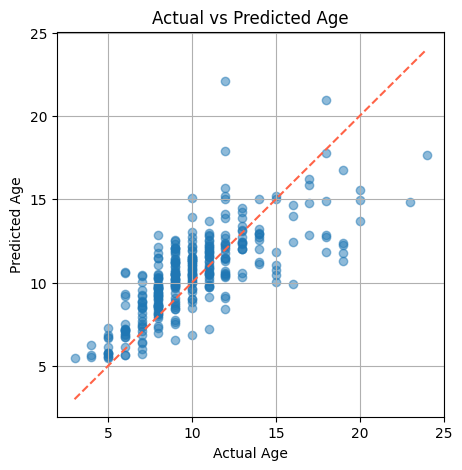

In [33]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 5)) 
plt.scatter(targets, preds, alpha=0.5)
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], color='tomato', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.grid()
plt.show()

In [34]:
for name, param in model.named_parameters():
    print(f'{name} : {param.requires_grad}')

fc1.weight : True
fc1.bias : True
fc2.weight : True
fc2.bias : True
fc3.weight : True
fc3.bias : True
fc4.weight : True
fc4.bias : True


In [35]:
inputs = torch.tensor([[2.0, 2.0, 2.0]])
targets = torch.tensor([[0.0, 0.0, 1.0]])

loss_fn = nn.MSELoss()

loss = loss_fn(inputs, targets)

print(loss)

tensor(3.)


In [42]:
epochs = 10
for epoch in range(epochs):
	for train_batch in train_loader:
		x_train, y_train = train_batch[0].to(device='mps'), train_batch[1].to(device='mps')
		
		pred = model(x_train).squeeze() # 차원이 1인 차원을 제거해줌
		loss = loss_fn(pred, y_train)
		print(loss)

		break


tensor(2.9626, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(3.2745, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(6.7786, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(6.1030, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(6.3023, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(6.8915, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(9.7731, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(5.0909, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(1.7310, device='mps:0', grad_fn=<MseLossBackward0>)
tensor(2.8100, device='mps:0', grad_fn=<MseLossBackward0>)


In [56]:
inputs = torch.tensor([[2.0, 2.0, 2.0]])
targets = torch.tensor([[0.0, 0.0, 1.0]])

loss_fn = nn.MSELoss()
loss = loss_fn(inputs, targets)
print(loss)

tensor(3.)


In [72]:
inputs = torch.randn(4, 3)
targets = torch.tensor([1, 1, 2, 0])

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(inputs, targets)
print(loss)

tensor(0.9965)


In [68]:
inputs = torch.randn(4)
targets = torch.tensor([1, 1, 0, 0], dtype=torch.float32)

loss_fn = nn.BCEWithLogitsLoss()
loss = loss_fn(inputs, targets.float())
print(loss)

tensor(0.5902)


In [73]:
x = torch.tensor([2.0], requires_grad=False)
print(x.requires_grad)

x.requires_grad_()
print(x.requires_grad)

False
True


In [76]:
# 순전파
x = torch.tensor([2.0], requires_grad=True)
y = x ** 3
print(y)

# 역전파
y.backward()
print(x.grad)

tensor([8.], grad_fn=<PowBackward0>)
tensor([12.])


In [77]:
epochs = 1
for epoch in range(epochs):
	for train_batch in train_loader:
		x_train, y_train = train_batch[0].to(device='mps'), train_batch[1].to(device='mps')
		
		pred = model(x_train).squeeze()
		loss = loss_fn(pred, y_train)
		loss.backward()
		break
	

In [78]:
for name, param in model.named_parameters():
    print(f'{name} : {param.requires_grad}')

fc1.weight : True
fc1.bias : True
fc2.weight : True
fc2.bias : True
fc3.weight : True
fc3.bias : True
fc4.weight : True
fc4.bias : True


In [79]:
for name, param in model.named_parameters():
    print(f'{name} : {param.grad}\n')
    

fc1.weight : tensor([[-4.7284e-01, -6.9584e-01, -2.1698e+00,  9.2911e-01,  4.9281e+00,
          3.1954e+00, -5.8247e+00],
        [-1.1645e+01, -1.2785e+01, -8.7060e+00, -1.4657e+01, -8.1909e+00,
         -1.3845e+01, -1.8841e+01],
        [ 3.7834e+00,  3.3795e+00,  2.8578e+00,  4.7241e+00,  5.3704e+00,
          5.2313e+00,  3.5616e+00],
        [-5.6310e+00, -5.1731e+00, -3.2432e+00, -6.4201e+00, -6.9592e+00,
         -6.4935e+00, -5.0665e+00],
        [-1.5723e+00, -1.6019e+00, -1.6712e+00, -9.6036e-01, -6.6818e-01,
         -9.5957e-01, -1.0948e+00],
        [ 8.9655e+00,  1.6190e+00,  1.0682e+01,  4.2202e+00,  2.8850e+01,
          6.5673e+00, -1.5866e+01],
        [-4.8550e+01, -4.7975e+01, -4.1279e+01, -5.1134e+01, -4.7000e+01,
         -4.3511e+01, -5.3185e+01],
        [-1.6636e+01, -1.4203e+01, -1.4909e+01, -2.1501e+01, -1.9847e+01,
         -1.9956e+01, -2.0989e+01],
        [ 1.7748e+01,  1.9774e+01,  2.2571e+01,  8.6310e+00, -2.0866e+01,
         -5.8748e+00,  5.3191e+01

In [81]:
x1 = torch.tensor([2.0])
x2 = torch.tensor([2.0], requires_grad=True)

print(x1.requires_grad)
print(x2.requires_grad)

False
True


In [82]:
x = torch.tensor([2.0], requires_grad=True)

y1 = x ** 3
print(y1)

with torch.no_grad():
    y2 = x ** 3
    print(y2)


tensor([8.], grad_fn=<PowBackward0>)
tensor([8.])
